## Required Packages

In [ ]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix

## Version Check

In [ ]:
print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(np.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Pandas: {}'.format(pd.__version__))
print('Scikit-learn: {}'.format(sklearn.__version__))

Python: 3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]
Numpy: 1.21.6
Matplotlib: 3.2.2
Pandas: 1.3.5
Scikit-learn: 1.0.2


## Dataset Load
More data information is in [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
names = ['id', 'radius_mean', 'texture_mean', 'perimeter_mean',
         'area_mean', 'smoothness_mean ', 'compactness_mean',
         'concavity_mean', 'concave points_mean ', 'symmetry_mean', 'fractal_dimension_mean']


df = pd.read_csv(url, names=names).replace('?', np.nan).dropna()

In [ ]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Preprocess data

In [ ]:
# Drop useless feature for classification
df.drop(['id'], axis=1, inplace=True)

## Summarize Dataset

In [ ]:
print(df.describe())

       radius_mean  texture_mean  perimeter_mean   area_mean  \
count   683.000000    683.000000      683.000000  683.000000   
mean      4.442167      3.150805        3.215227    2.830161   
std       2.820761      3.065145        2.988581    2.864562   
min       1.000000      1.000000        1.000000    1.000000   
25%       2.000000      1.000000        1.000000    1.000000   
50%       4.000000      1.000000        1.000000    1.000000   
75%       6.000000      5.000000        5.000000    4.000000   
max      10.000000     10.000000       10.000000   10.000000   

       smoothness_mean   concavity_mean  concave points_mean   symmetry_mean  \
count        683.000000      683.000000            683.000000     683.000000   
mean           3.234261        3.445095              2.869693       1.603221   
std            2.223085        2.449697              3.052666       1.732674   
min            1.000000        1.000000              1.000000       1.000000   
25%            2.000000

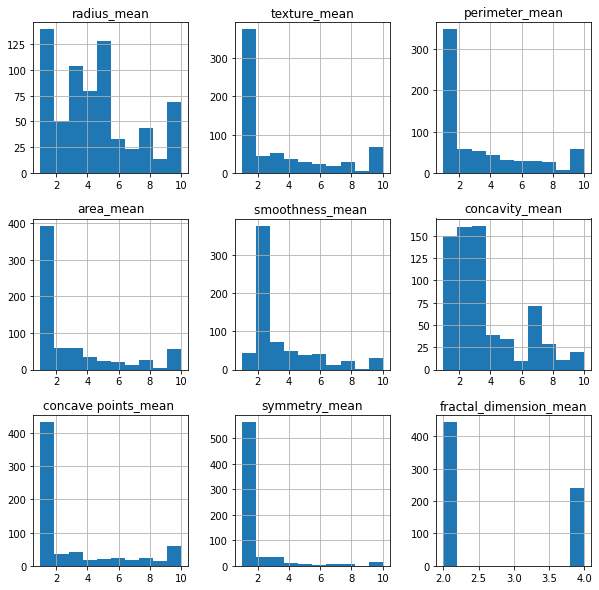

In [ ]:
# Plot histograms for each variable
df.hist(figsize=(10, 10));

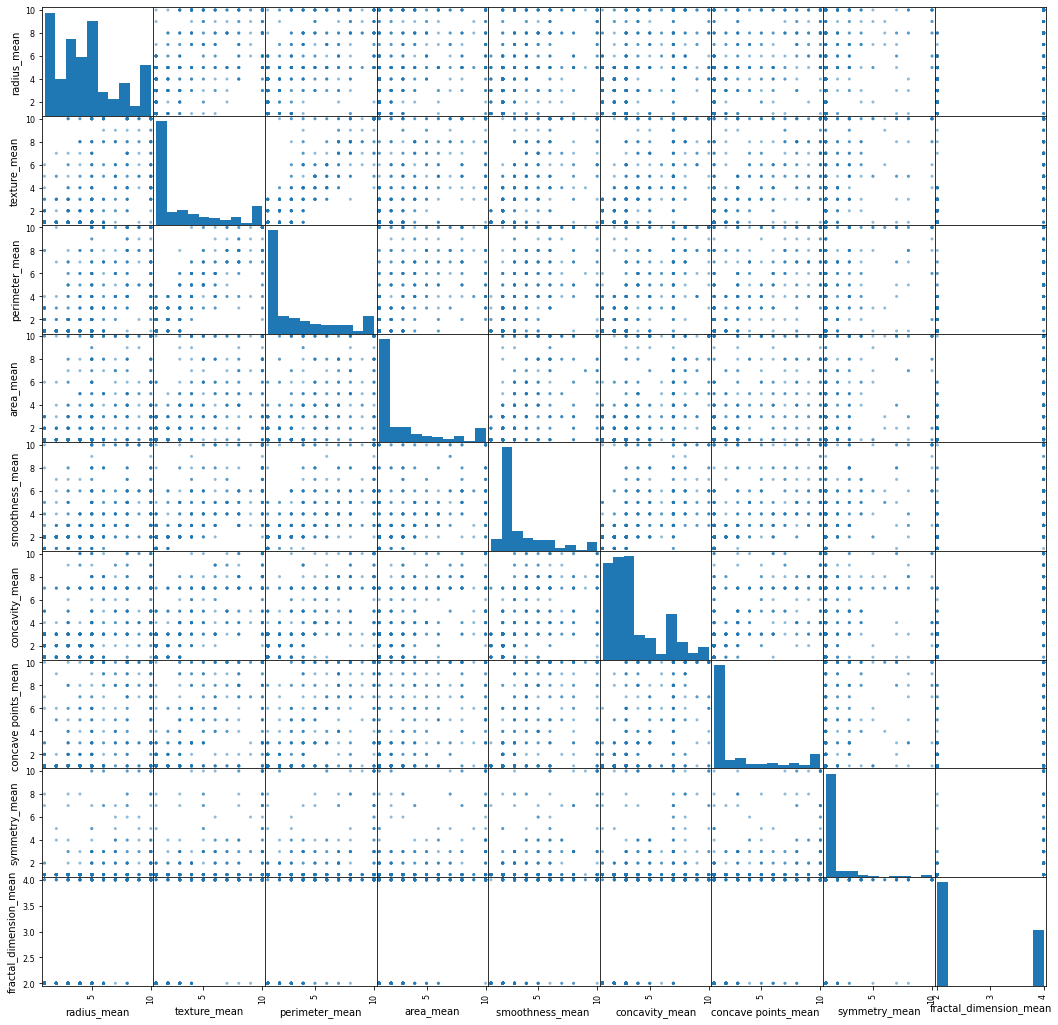

In [ ]:
# Create scatter plot matrix
scatter_matrix(df, figsize=(18, 18));

## Split Train/Test data

In [ ]:
X = df.drop(['class'], axis=1).to_numpy()
y = df['class'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

KeyError: ignored

## Specify Test options

In [ ]:
seed = 8
scoring = 'accuracy'

## Define the model to train


In [ ]:
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.981684 (0.020103)
SVM: 0.974310 (0.017003)


## Make Predictions on validation dataset

In [ ]:
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN
0.9635036496350365
              precision    recall  f1-score   support

           2       0.97      0.98      0.97        89
           4       0.96      0.94      0.95        48

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137

SVM
0.9562043795620438
              precision    recall  f1-score   support

           2       0.98      0.96      0.97        89
           4       0.92      0.96      0.94        48

    accuracy                           0.96       137
   macro avg       0.95      0.96      0.95       137
weighted avg       0.96      0.96      0.96       137



## Another way to get accuracy

In [ ]:
clf = SVC()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9562043795620438


## Test it with samples

In [ ]:
example = np.array([[4, 2, 1, 1, 1, 2, 3, 2, 10]])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)

[2]


In [ ]:
example = np.array([[10, 2, 1, 1, 1, 2, 3, 2, 10]])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)

[4]
